# Introduction to NLP - NLTK

In [1]:
import nltk

In [2]:
# nltk.download()

In [3]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

In [4]:
from nltk.tokenize import word_tokenize
input_txt = "I am learning NLP and using NLTK"
word_tokens = word_tokenize(input_txt)
print(input_txt)
print(word_tokens)

I am learning NLP and using NLTK
['I', 'am', 'learning', 'NLP', 'and', 'using', 'NLTK']


# NLP Pipeline

- Raw Text (reading raw data)
- Tokenization (text to words)
- Text Cleaning (removing punctuation and stop words, stemming)
- Vectorization (word2vec, bag of words, tf-idf)
- ML Algorithm 
- Spam Filter

# Raw Text - Reading Text Data

## Method 1: open()  and  .read

In [5]:
raw_data = open('../Datasets/SMSSpamCollection').read()
raw_data[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [6]:
parsed_data = raw_data.replace('\t','\n').split('\n')
parsed_data[0:10]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though"]

In [7]:
label_list = parsed_data[0::2]
msg_list = parsed_data[1::2]
print(label_list[0:5])
print(msg_list[0:5])

['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


In [8]:
print(len(label_list))
print(len(msg_list))
print(label_list[-3:])

5575
5574
['ham', 'ham', '']


In [9]:
import pandas as pd

combined_df = pd.DataFrame({
    'label' : label_list[:-1],
    'sms' : msg_list
})

combined_df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Method 2: read_csv()

In [10]:
data = pd.read_csv('../Datasets/SMSSpamCollection', sep='\t', header=None)
data.columns = ['label', 'sms']
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploring the Data

In [11]:
data.shape

(5572, 2)

In [12]:
print(f"Input data has {len(data)} rows, {len(data.columns)} columns")

Input data has 5572 rows, 2 columns


In [13]:
print(f"ham = {len(data[data['label'] == 'ham'])}")
print(f"spam = {len(data[data['label'] == 'spam'])}")

ham = 4825
spam = 747


In [14]:
print(f"Numbers of missing label = {data['label'].isnull().sum()}")
print(f"Numbers of missing msg = {data['sms'].isnull().sum()}")

Numbers of missing label = 0
Numbers of missing msg = 0


# Text Pre-processing (Tokenization + Text Cleaning)

- Remove Punctuation
- Tokenization
- Remove stop words
- Stemming/Lemmatizing

## Remove Punctuation

Removing unnecessary characters.

We will make use of the "**string.punctuation**" library for this.

In [15]:
pd.set_option('display.max_colwidth', 100)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [16]:
"I am teaching NLP" == "I am teaching NLP."

False

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [19]:
data['msg_clean'] = data['msg'].apply(lambda x: remove_punctuation(x))
data.head()

,label,msg,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


## Tokenization

Split text into list of words / tokens.

We will make use of the regular expression "**re**" library for this.

In [20]:
import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

data['msg_clean_tokenized'] = data['msg_clean'].apply(lambda x: tokenize(x.lower()))

data.head()

,label,msg,msg_clean,msg_clean_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


## Remove Stop Words

Get rid of commonly used words which do not add much meaning.

By removing extra stop words, we are giving very less words to our python algorithm to work with, thus speeding it up.

In [21]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [22]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

data['msg_no_sw'] = data['msg_clean_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,label,msg,msg_clean,msg_clean_tokenized,msg_no_sw
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


## Stemming

**What is Stemming?**

Stemming is a powerful tool to reduce the size of corpus that the model needs to work on.   
Explicitly correlates words with similar meaning.

It is a process of reducing inflected (or derived) words to their root word or word stem.

Ex.

code   
coder   
coders   
coding   

All are derived from "**code**"

Since it is based in heuristics it is not a perfect rule that converts every word correctly to their stem word.

**Errors in Stemming**

**1) Overstemming**

- Too much of word is cut off (meaning lost)
- 2 words of different stems reduced to same stem

Ex.

university   
universities

universal   
universe

They all could be converted to the same stem "**univers** ...   
while it would be better the first two be stemmed to "**universi**" and the second two words be stemmed to "**univers**"

**2) Understemming**

- 2 words of same stem mapped to different stems

Ex.

data  
datum

In this case, the first word is mapped or reduced to "**dat**" and the other to "**datu**"".   
So it has broken down into two different stems, although both should have been mapped to a common stem.

**Stemming Algorithms**

There are several stemming algorithms, but these ones are included in the NLTK toolkit package.

- Porter Stemmer (most popular)
- Snowball Stemmer
- Lancaster Stemmer
- Regex-based Stemmer

### Porter Stemming

In [23]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [24]:
print(ps.stem('coder'))
print(ps.stem('coding'))
print(ps.stem('code'))

coder
code
code


In [25]:
print(ps.stem('data'))
print(ps.stem('datum'))

data
datum


In [26]:
print(ps.stem('bowl'))
print(ps.stem('bowling'))
print(ps.stem('bowler'))

bowl
bowl
bowler


In [27]:
data = pd.read_csv('../Datasets/SMSSpamCollection', sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [28]:
def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [29]:
data['msg_nostop'] = data['msg'].apply(lambda x: clean_text(x.lower()))
data.head()

,label,msg,msg_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


**Stem the text**

In [30]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [31]:
data['msg_stemmed'] = data['msg_nostop'].apply(lambda x: stemming(x))
data.head()

,label,msg,msg_nostop,msg_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


## Lemmatization

A popular Normalization algorithm for words that is called Lemmatization.

- Process of grouping together the inflected forms of a word to be analyzed as a single root word or ***lemma***
- Unlike Stemming, it reduces the inflected words properly ensuring that the root word (***lemma***)  belongs to the language
- A ***lemma*** is the canonical form, dictionary form, or citation form of a set of words
- It is slower than Stemming but it is more accurate

Ex.

bowl   
bowled   
bowling   

convert to ***bowl***

**Lemmatization vs Stemming**

- Speed vs Accuracy tradeoff


- ***Stemming*** is typically faster   
  - simply chops off the end of a word using heuristics   
  - no understanding of the context
   

- ***Lemmatization*** is typically more accurate
  - Uses more informed analysis   
  - Always reduce to a dictionary word   
  - More accurate but computationally expensive

### WordNetLemmatizer

In [32]:
wn = nltk.WordNetLemmatizer()
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [33]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [34]:
print(ps.stem('cactus'))
print(ps.stem('cacti'))

cactu
cacti


In [35]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


In [36]:
print(wn.lemmatize('cactus'))
print(wn.lemmatize('cacti'))

cactus
cactus


In [37]:
data = pd.read_csv('../Datasets/SMSSpamCollection', sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [38]:
data['msg_nostop'] = data['msg'].apply(lambda x: clean_text(x.lower()))
data.head()

,label,msg,msg_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


In [39]:
def lemmatization(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [40]:
data['msg_lemmatized'] = data['msg_nostop'].apply(lambda x: lemmatization(x))
data.head()

,label,msg,msg_nostop,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"


# Vectorization

How to represent each of the words / tokens as numerical feature vectors?

Vectorization is the process of encoding text as integers to create Feature Vectors.

***Feature Vectors***: vector of numerical features that represent an object

**Types of Vectorization**

- CountVectorization
- N-grams
- TF-IDF

## Count Vectorization

It is the simplest choice of the existing vectorization techniques, which counts the words appearing in a document and hence creates a document-term matrix.   


Note that the document needs to be handled from raw text format (cleaned, punctuation and stop words removed, tokenized, stemmed/lemmatized, etc).   


Then from the list of words of the documents, we extract all the unique words and then count how many times they have occurred in the entire text corpus and write the corresponding frequencies in each document. So this will create the document-term matrix.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

corpus = ["This is a sentence is",
         "This is another sentence",
         "third document is here"]

X = cv.fit(corpus)
print(X.vocabulary_)
print(cv.get_feature_names())

{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}
['another', 'document', 'here', 'is', 'sentence', 'third', 'this']


Note: it sorts in alphabetical order

In [42]:
X = cv.transform(corpus)
# X = cv.fit_transform(corpus)
print(X.shape)
print(type(X)) # Sparse matrix
print(X)
print(X.toarray()) # to print in the matrix form

(3, 7)
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 3)	2
  (0, 4)	1
  (0, 6)	1
  (1, 0)	1
  (1, 3)	1
  (1, 4)	1
  (1, 6)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1
[[0 0 0 2 1 0 1]
 [1 0 0 1 1 0 1]
 [0 1 1 1 0 1 0]]


In [43]:
df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
print(df)

   another  document  here  is  sentence  third  this
0        0         0     0   2         1      0     1
1        1         0     0   1         1      0     1
2        0         1     1   1         0      1     0


### CountVectorization on SMSSpamCollection

Customizing it for the SMSSpamCollection dataset.

Building the whole Pipeline

In [44]:
# Read Raw Text

import pandas as pd
import re
import string
import nltk

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../Datasets/SMSSpamCollection', sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [45]:
# Text Cleaning

def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])   # remove punctuation
    tokens = re.split('\W+', text)                                     # tokenize
    text = [ps.stem(word) for word in tokens if word not in stopwords] # remove stopwords and apply Porter Stemming
    return text

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Define an analyzer instead of the default one
cv1 = CountVectorizer(analyzer=clean_text)

X = cv1.fit_transform(data['msg'])
print(X.shape)

(5572, 8340)


In [47]:
print(cv1.get_feature_names())

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0870121318

In [48]:
data_sample = data[0:10]

cv2 = CountVectorizer(analyzer=clean_text)

X = cv2.fit_transform(data_sample['msg'])
print(X.shape)

(10, 131)


In [49]:
df = pd.DataFrame(X.toarray(), columns = cv2.get_feature_names())
df

,08002986030,08452810075over18,09061701461,11,12,150,2,2005,21st,3,...,vettam,wat,week,wif,win,winner,wkli,word,world,xxx
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## N-Grams Vectorization

N-Grams creates a document-term matrix where:
- columns represent all columns of adjacent words of length "**n**"
- cells represent count

         Ex.: "I am studying NLP"

**bigram**: "I am", "am studying", "studying NLP"

**trigram**: "I am studying", "am studying NLP"

**4-gram**: "I am studying NLP"

In [50]:
# Calling the CountVectorizer function, but now passing the "ngrams" to use
cv = CountVectorizer(ngram_range=(2,2))

corpus = ["This is a sentence is",
         "This is another sentence",
         "third document is here"]

X = cv.fit_transform(corpus)

print(X.shape, type(X))
print(X)
print(X.toarray())

df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
print(df)

(3, 8) <class 'scipy.sparse.csr.csr_matrix'>
  (0, 5)	1
  (0, 4)	1
  (0, 7)	1
  (1, 0)	1
  (1, 2)	1
  (1, 7)	1
  (2, 3)	1
  (2, 1)	1
  (2, 6)	1
[[0 0 0 0 1 1 0 1]
 [1 0 1 0 0 0 0 1]
 [0 1 0 1 0 0 1 0]]
   another sentence  document is  is another  is here  is sentence  \
0                 0            0           0        0            1   
1                 1            0           1        0            0   
2                 0            1           0        1            0   

   sentence is  third document  this is  
0            1               0        1  
1            0               0        1  
2            0               1        0  


In [51]:
cv = CountVectorizer(ngram_range=(1,4))
X = cv.fit_transform(corpus)
print(X.shape)
df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
print(df)

(3, 24)
   another  another sentence  document  document is  document is here  here  \
0        0                 0         0            0                 0     0   
1        1                 1         0            0                 0     0   
2        0                 0         1            1                 1     1   

   is  is another  is another sentence  is here  ...  third  third document  \
0   2           0                    0        0  ...      0               0   
1   1           1                    1        0  ...      0               0   
2   1           0                    0        1  ...      1               1   

   third document is  third document is here  this  this is  this is another  \
0                  0                       0     1        1                0   
1                  0                       0     1        1                1   
2                  1                       1     0        0                0   

   this is another sentence  this is 

### N-Grams CountVectorization on SMSSpamCollection

In [52]:
# Changing the Text Cleaning function
# Adding " ".join() at the 3rd line

def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

data['msg_clean'] = data['msg'].apply(lambda x: clean_text(x))
data.head()

,label,msg,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,Ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win FA cup final tkt 21st may 2005 text FA 87121 receiv entri questionstd...
3,ham,U dun say so early hor... U c already then say...,U dun say earli hor U c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah I dont think goe usf live around though


**IMPORTANT**: Note that **msg_clean** column contains a clean text, but **it is a sentence now**.

In [53]:
# Providing the "ngrams" parameter
cv1 = CountVectorizer(ngram_range=(2,2))

X = cv1.fit_transform(data['msg_clean'])
print(X.shape)

(5572, 34162)


In [54]:
# Providing the "ngrams" parameter AND an analyzer function instead of the default one
cv1 = CountVectorizer(analyzer=clean_text, ngram_range=(2,2))

X = cv1.fit_transform(data['msg'])
print(X.shape)

(5572, 71)


In [55]:
data_sample = data[0:10]

# cv2 = CountVectorizer(analyzer=clean_text, ngram_range=(2,2))
cv2 = CountVectorizer(ngram_range=(2,2))

X = cv2.fit_transform(data_sample['msg_clean'])
print(X.shape)

df = pd.DataFrame(X.toarray(), columns = cv2.get_feature_names())
df

(10, 126)


,09061701461 claim,11 month,12 hour,150 rcv,2005 text,21st may,87121 receiv,900 prize,aid patent,alreadi say,...,valu network,vettam set,week word,wif oni,win fa,winner as,wkli comp,word back,world la,xxx std
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Vectorizer

Creates a document-term matrix where:
- columns are individual unique words
- cells contain a weight which signifies how important a word is for an individual text message

$w_{i,j} = tf_{i,j} \times log \left(\frac{N}{df_i}\right)$

Where:

$w_{i,j}$ -> weight of a term I in a document J

$N$ -> Total number of documents in the Corpus

$tf_{i,j}$ -> Number of times a term I occurs in a document J divided by total number of terms in J

$df_i$ -> Number of documents which contain the term I

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

corpus = ["This is a sentence is",
         "This is another sentence",
         "third document is here"]

X = tfidf_vect.fit(corpus)
print(X.vocabulary_)
print(tfidf_vect.get_feature_names())

X = tfidf_vect.transform(corpus)
#X = tfidf.fit_transform(corpus)

print(X.shape, type(X))
print(X)
print(X.toarray())

df = pd.DataFrame(X.toarray(), columns = tfidf_vect.get_feature_names())
print(df)

{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}
['another', 'document', 'here', 'is', 'sentence', 'third', 'this']
(3, 7) <class 'scipy.sparse.csr.csr_matrix'>
  (0, 6)	0.4760629392767929
  (0, 4)	0.4760629392767929
  (0, 3)	0.7394106813498714
  (1, 6)	0.4804583972923858
  (1, 4)	0.4804583972923858
  (1, 3)	0.3731188059313277
  (1, 0)	0.6317450542765208
  (2, 5)	0.546454011634009
  (2, 3)	0.3227445421804912
  (2, 2)	0.546454011634009
  (2, 1)	0.546454011634009
[[0.         0.         0.         0.73941068 0.47606294 0.
  0.47606294]
 [0.63174505 0.         0.         0.37311881 0.4804584  0.
  0.4804584 ]
 [0.         0.54645401 0.54645401 0.32274454 0.         0.54645401
  0.        ]]
    another  document      here        is  sentence     third      this
0  0.000000  0.000000  0.000000  0.739411  0.476063  0.000000  0.476063
1  0.631745  0.000000  0.000000  0.373119  0.480458  0.000000  0.480458
2  0.000000  0.546454  0.546454  0.322745  0.000

### TF-IDF Vectorizer on SMSSpamCollection

In [57]:
# Text Cleaning

def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])   # remove punctuation
    tokens = re.split('\W+', text)                                     # tokenize
    text = [ps.stem(word) for word in tokens if word not in stopwords] # remove stopwords and apply Porter Stemming
    return text

data['msg_clean'] = data['msg'].apply(lambda x: clean_text(x))
data.head()

,label,msg,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, FA, cup, final, tkt, 21st, may, 2005, text, FA, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, I, dont, think, goe, usf, live, around, though]"


In [58]:
# Define an analyzer instead of the default one
tfidf1 = TfidfVectorizer(analyzer=clean_text)

X = tfidf1.fit_transform(data['msg'])
print(X.shape)

(5572, 8340)


In [59]:
data_sample = data[0:10]

tfidf2 = TfidfVectorizer(analyzer=clean_text)

X = tfidf2.fit_transform(data_sample['msg'])
print(X.shape)

(10, 131)


In [60]:
df = pd.DataFrame(X.toarray(), columns = tfidf2.get_feature_names())
df

,08002986030,08452810075over18,09061701461,11,12,150,2,2005,21st,3,...,vettam,wat,week,wif,win,winner,wkli,word,world,xxx
0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.25,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.25,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.408248,0.000000,0.00000,0.000000,0.000000,0.00,0.000000
2,0.000000,0.193446,0.00000,0.000000,0.00000,0.000000,0.193446,0.193446,0.193446,0.000000,...,0.000000,0.00,0.000000,0.000000,0.193446,0.00000,0.193446,0.000000,0.00,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000
5,0.000000,0.000000,0.00000,0.000000,0.00000,0.231109,0.000000,0.000000,0.000000,0.231109,...,0.000000,0.00,0.231109,0.000000,0.000000,0.00000,0.000000,0.231109,0.00,0.231109
6,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000
7,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.219673,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000
8,0.000000,0.000000,0.21594,0.000000,0.21594,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.21594,0.000000,0.000000,0.00,0.000000
9,0.187859,0.000000,0.00000,0.187859,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000


# Feature Engineering

Creating new features of transforming existing features using domain knowledge of the data, that makes machine learning algorithm work better.

Some examples of F.E.:

- Length of documents
- Average word size within a document
- Use of punctuation in the text
- Capitalization of words in a document
- etc.

**Transformations**

Applying some transformations to data can make it work better

- Power transformations ($x^2$, $\sqrt{x}$, etc.)
- Standardizing data
- Normalization: bring different features to similar scale

## Create Feature: message length

In [61]:
data = pd.read_csv('../Datasets/SMSSpamCollection', sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [62]:
data['msg_len'] = data['msg'].apply(lambda x: len(x))
data.head()

,label,msg,msg_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


## Create Feature: punctuation usage

In [63]:
def punctuation_count(txt):
    count = sum([1 for c in txt if c in string.punctuation])
    return 100*count/len(txt)

data['punctuation_%'] = data['msg'].apply(lambda x: punctuation_count(x))
data.head()

,label,msg,msg_len,punctuation_%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,3.278689


# Feature Evaluation

In [64]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Plot message lengths for spam and ham

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


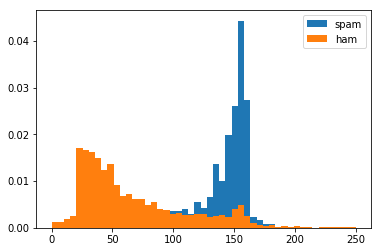

In [65]:
bins = np.linspace(0, 250, 50)
plt.hist(data[data['label'] == 'spam']['msg_len'], bins, label='spam', normed=True)
plt.hist(data[data['label'] == 'ham']['msg_len'], bins, label='ham', normed=True)
plt.legend(loc='best')
plt.show()

**Conclusion**: message length is a good feature to be used

## Plot to evaluate punctuation percentage

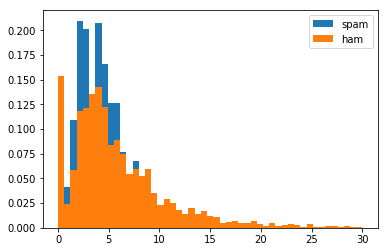

In [66]:
bins = np.linspace(0, 30, 50)
plt.hist(data[data['label'] == 'spam']['punctuation_%'], bins, label='spam', normed=True)
plt.hist(data[data['label'] == 'ham']['punctuation_%'], bins, label='ham', normed=True)
plt.legend(loc='best')
plt.show()

**Conclusion**: punctuation percentage is NOT a good feature to be used

# Transformations

Changing each data point in a certain column to make the distribution look closer to a normal distribution.

**Tukey Transformation**

$y = \left\{\begin{matrix} x^\lambda , \lambda > 0\\ log(x) , \lambda = 0\\ -(x^\lambda) , \lambda < 0 \end{matrix}\right.$

**Box-Cox Transformation**

$y = \left\{\begin{matrix} \frac{x^\lambda - 1}{\lambda} , \lambda \neq 0\\ log(x) , \lambda = 0 \end{matrix}\right.$

**Trasformation Process**

- Determine range of exponents to test

- Apply tranformations to each value of the chosen feature

- Determine which transformation yields best distribution, e.g., plot histogram and pick which looks closer to a normal distribution

## Plot the new features

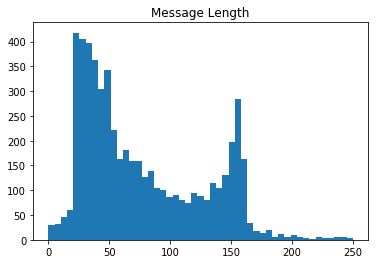

In [67]:
bins = np.linspace(0, 250, 50)
plt.hist(data['msg_len'], bins)
plt.title('Message Length')
plt.show()

**Conclusion**: it is kind of bimodal distribution spread somewhat uniformly - not a candidate for transformation

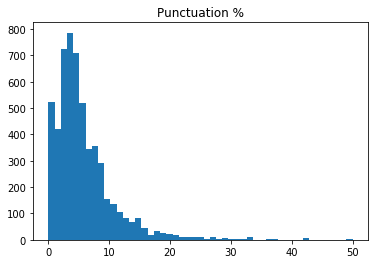

In [68]:
bins = np.linspace(0, 50, 50)
plt.hist(data['punctuation_%'], bins)
plt.title('Punctuation %')
plt.show()

**Conclusion**: data has skewed distribution with a long right tail - it can be applied some transformation on it

## Defining some power transformations

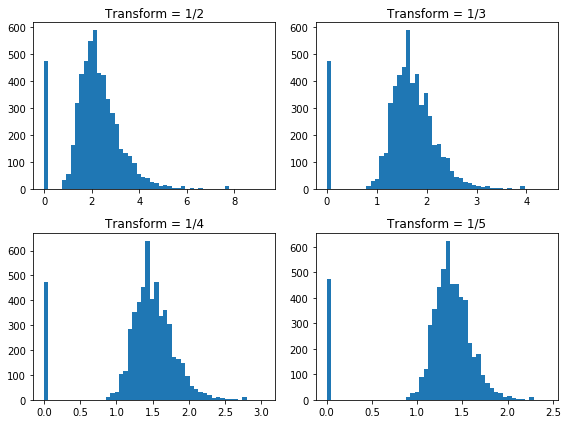

In [69]:
plt.figure(figsize=(8,6))
for k,v in enumerate([2, 3, 4, 5]):
    plt.subplot(2,2,k+1)
    plt.hist((data['punctuation_%'])**(1/v), bins=50)
    plt.title(f'Transform = 1/{v}')
plt.tight_layout()

# Evaluation Metrics

$Accuracy = \frac{\#(predicted correctly)}{\#(observations}$

$Precision = \frac{\#(predicted as Spam correctly)}{\#(predicted as Spam}$

$Recall = \frac{\#(predicted as Spam correctly)}{\#(actually Spam}$

$F1 = (\frac{2}{Recall^{-1} + Precision^{-1}}) = 2 \times \frac{Precision \times Recall}{Precision + Recall}$